In [7]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [8]:
# Importing the dataset
X = pd.read_csv('../Datasets/NB.csv')
X['Fault'] = 0

y = pd.read_csv('../Datasets/OR - 7.csv')
y['Fault'] = 1

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.2, shuffle=False, random_state = 0)

y_train, y_test = train_test_split(y, test_size = 0.2, shuffle=False, random_state = 0)

In [10]:
train = pd.concat([X_train, y_train], ignore_index=True)
train = train.reset_index(drop=True)
train

,DE,FE,Fault
0,0.064254,0.038625,0
1,0.063002,0.096769,0
2,-0.004381,0.127382,0
3,-0.035882,0.144640,0
4,-0.023991,0.086702,0
...,...,...,...
193843,0.149846,-0.161076,1
193844,0.065786,-0.167651,1
193845,-0.021117,0.293184,1
193846,-0.042233,0.030818,1


In [11]:
test = pd.concat([X_test, y_test], ignore_index=True)
test = test.reset_index(drop=True)
test

,DE,FE,Fault
0,0.058204,-0.015204,0
1,0.011057,0.005958,0
2,-0.066548,0.066362,0
3,-0.131845,0.110535,0
4,-0.132471,0.096153,0
...,...,...,...
48457,0.165278,0.099029,1
48458,-0.075938,0.032256,1
48459,-0.268830,0.050747,1
48460,0.012995,0.093687,1


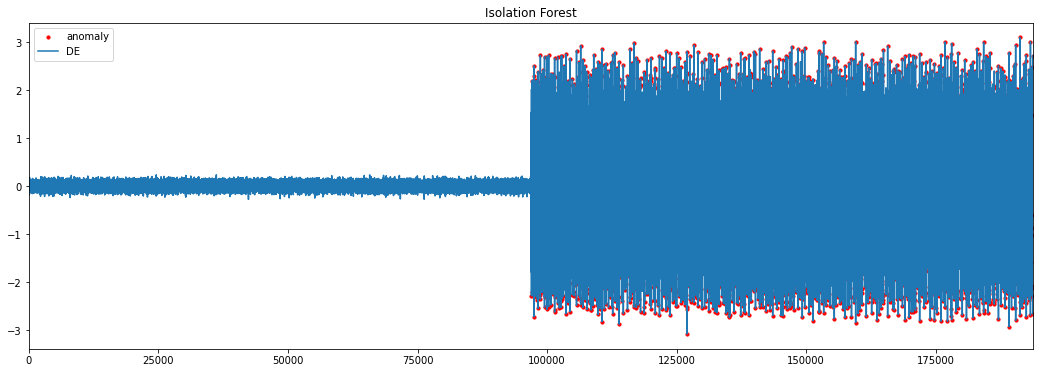

In [12]:
from sklearn.ensemble import IsolationForest

train_data = train[['DE', 'FE']]
scaler = MinMaxScaler()
np_scaled = scaler.fit_transform(train_data)
train_data = pd.DataFrame(np_scaled)
outliers_fraction = 0.01

# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(train_data) 
train['anomaly'] = pd.Series(model.predict(train_data))

# visualization
train_anomalies = train[train['anomaly'] == -1]

f, (ax1) = plt.subplots(figsize=(18, 6))
ax1.scatter(train_anomalies.index, train_anomalies.DE, label='anomaly', color='red', s=10)
ax1.plot(train.index, train.DE, label='DE');
plt.xlim((0,len(train.index)))

plt.title('Isolation Forest')
plt.legend();
plt.show();

In [13]:
train_anomalies

,DE,FE,Fault,anomaly
96987,-2.281807,-0.049309,1,-1
97102,2.203026,0.513842,1,-1
97104,-2.205057,-0.607735,1,-1
97215,-2.286681,0.014382,1,-1
97217,2.059677,0.434331,1,-1
...,...,...,...,...
193633,2.476324,0.227438,1,-1
193635,-2.289117,-0.439056,1,-1
193745,-2.119372,-0.288253,1,-1
193747,2.724849,0.450562,1,-1


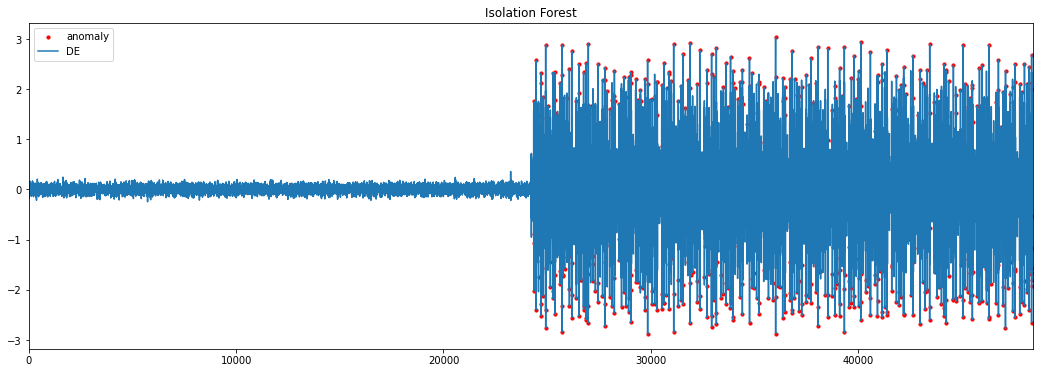

In [14]:
test_data = test[['DE', 'FE']]
scaler = MinMaxScaler()
np_scaled = scaler.fit_transform(test_data)
test_data = pd.DataFrame(np_scaled)

test['anomaly'] = pd.Series(model.predict(test_data))

# visualization
test_anomalies = test[test['anomaly'] == -1]

f, (ax1) = plt.subplots(figsize=(18, 6))
ax1.scatter(test_anomalies.index, test_anomalies.DE, label='anomaly', color='red', s=10)
ax1.plot(test.index, test.DE, label='DE');
plt.xlim((0,len(test.index)))

plt.title('Isolation Forest')
plt.legend();
plt.show();

In [15]:
test_anomalies

,DE,FE,Fault,anomaly
24356,-2.024754,-0.218604,1,-1
24358,1.757142,0.455904,1,-1
24369,-0.883241,0.541989,1,-1
24373,-1.066387,-0.669371,1,-1
24471,-2.394700,0.222918,1,-1
...,...,...,...,...
48383,-1.656432,-0.483024,1,-1
48389,-1.170345,0.591709,1,-1
48393,-1.805873,0.333864,1,-1
48396,-0.524259,0.727309,1,-1


In [16]:
from sklearn.metrics import accuracy_score
score = 100 * accuracy_score(test['anomaly'], test['Fault'])
print("Accuracy: {:.2f}%".format(score))

Accuracy: 48.66%


In [17]:
print("Anomalies: {}".format(test_anomalies['anomaly'].count()))

Anomalies: 648
